In [170]:
from matplotlib import pyplot as plt
import numpy as np

# The Mandelbrot set

The Mandelbrot set is the set of complex numbers $c \in \mathbb{C}$ for which the iteration,

$$z_{n+1} = z_n^2 + c,$$

converges, starting iteration at $z_1 = 0$. We can visualize the Mandelbrot set by plotting the number of iterations needed for the absolute value $|z_n|$ to exceed 2 (for which it can be shown that the iteration always diverges).

In [186]:
max_iter = 256
width = 256
height = 256
center = -0.8+0.0j
extent = 3.0+3.0j
scale = max((extent / width).real, (extent / height).imag)

result = np.zeros(dtype=int, shape=(height, width))
for j in range(height):
    for i in range(width):
        c = center + (i - width // 2 + (j - height // 2)*1j) * scale
        z = 0
        for k in range(max_iter):
            z = z**2 + c
            if (z * z.conjugate()).real > 4.0:
                break
        result[j, i] = k

Text(0, 0.5, '$\\Im(c)$')

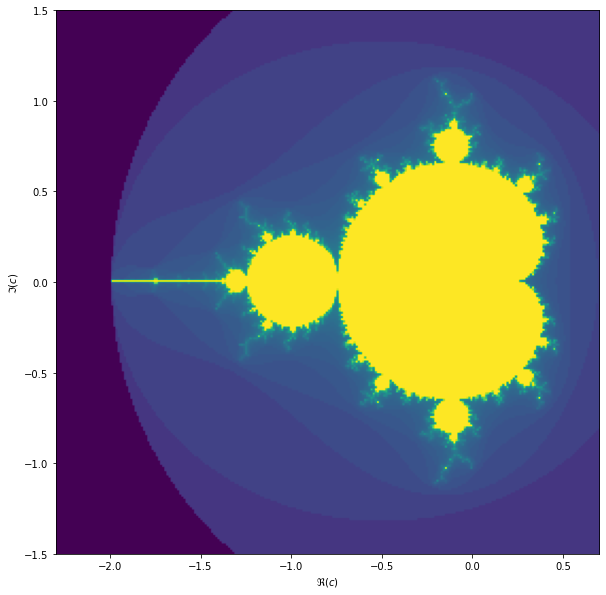

In [187]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_extent = (width + 1j * height) * scale
z1 = center - plot_extent / 2
z2 = z1 + plot_extent
ax.imshow(result**(1/3), origin='lower', extent=(z1.real, z2.real, z1.imag, z2.imag))
ax.set_xlabel("$\Re(c)$")
ax.set_ylabel("$\Im(c)$")

## Zoom in

The Mandelbrot set is a lot of fun to zoom into. We can play around with the `center` and `extent` values (and necessarily `max_iter`) to control our window.

In [190]:
max_iter = 1024
center = -1.1195+0.2718j
extent = 0.005+0.005j
scale = max((extent / width).real, (extent / height).imag)

result = np.zeros(dtype=int, shape=(height, width))
for j in range(height):
    for i in range(width):
        c = center + (i - width // 2 + (j - height // 2)*1j) * scale
        z = 0
        for k in range(max_iter):
            z = z**2 + c
            if (z * z.conjugate()).real > 4.0:
                break
        result[j, i] = k

Text(0, 0.5, '$\\Im(c)$')

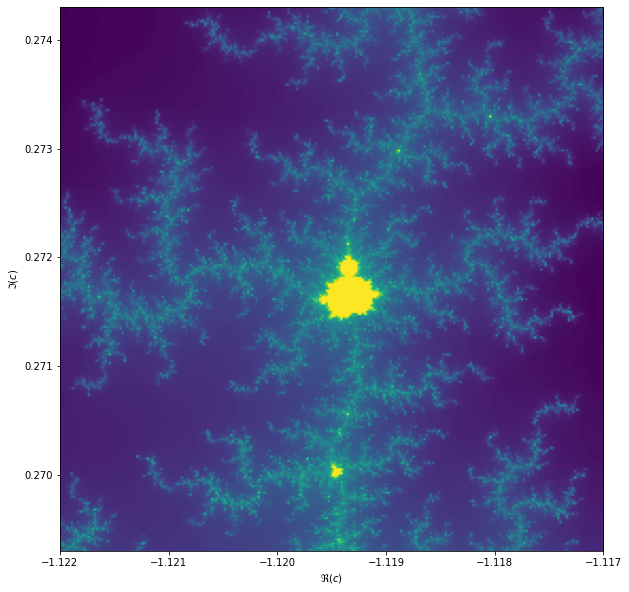

In [191]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_extent = (width + 1j * height) * scale
z1 = center - plot_extent / 2
z2 = z1 + plot_extent
ax.imshow(np.log(result), origin='lower', extent=(z1.real, z2.real, z1.imag, z2.imag))
ax.set_xlabel("$\Re(c)$")
ax.set_ylabel("$\Im(c)$")

## The (family of) Julia sets

For each value $c$ we can compute the Julia set, namely the set of starting values $z_1$ for which the iteration over $z_{n+1}=z_n^2 + c$ converges.

In [192]:
max_iter = 256
center = 0.0+0.0j
extent = 4.0+3.0j
scale = max((extent / width).real, (extent / height).imag)

result = np.zeros(dtype=int, shape=(height, width))
c = -1.1193+0.2718j

for j in range(height):
    for i in range(width):
        z = center + (i - width // 2 + (j - height // 2)*1j) * scale
        for k in range(max_iter):
            z = z**2 + c
            if (z * z.conjugate()).real > 4.0:
                break
        result[j, i] = k

Text(0, 0.5, '$\\Im(z_0)$')

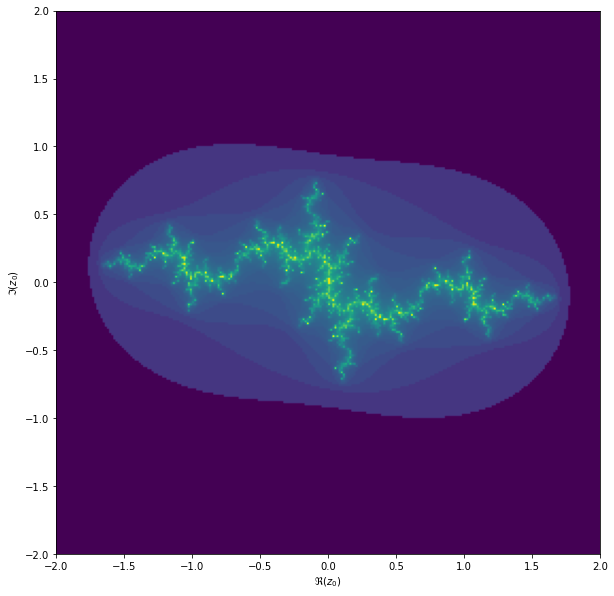

In [193]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_extent = (width + 1j * height) * scale
z1 = center - plot_extent / 2
z2 = z1 + plot_extent
ax.imshow(result**(1/3), origin='lower', extent=(z1.real, z2.real, z1.imag, z2.imag))
ax.set_xlabel("$\Re(z_0)$")
ax.set_ylabel("$\Im(z_0)$")

## Exercise

This is not even the worst code. Variables are aptly named and the code is nicely parametrized. However, this code utterly lacks in modularity. The author has never heard of classes or functions! Try to improve this code to get less repetition and better isolation of concerns, while at the same time bundling things that belong together. To achieve this you should consider using functions to isolate functionality, while using classes to bundle things that are related.

hint: Start by introducing enough abstraction so that zooming in on the Mandelbrot set becomes easier. Once you're happy with that (and there's time left) you could also generalise for including the Julia set.